### Classification models

- Logistic Regression
- Random Forest Classifier
- SVM
- KNN
- XGBoost
- Ensemble

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, RepeatedKFold, RepeatedStratifiedKFold, StratifiedKFold

import sklearn.metrics as metrics

import warnings

warnings.filterwarnings("ignore")

In [2]:
##### Importo los datos
df = pd.read_csv("hospital_train.csv")

##### Reemplazo los nombres de las columnas
column_names = pd.read_csv("columns_meaning.csv", index_col = 0)
column_names_dict = column_names.to_dict()
df.columns = column_names_dict["Description"].values()

##### Paso las variables nominales a dummies
df = pd.get_dummies(df, prefix = ["hospital_type", "hospital_city", "hospital_region", "department", "ward_type", "ward_facility"], columns = ["Unique code for the type of Hospital", "City Code of the Hospital", "Region Code of the Hospital", "Department overlooking the case", "Code for the Ward type", "Code for the Ward Facility"])

##### Mapeo las variables ordinales
# Admission Type registered by the Hospital
dict_1 = {
    "Emergency" : 1,
    "Trauma" : 2,
    "Urgent" : 3
}

# Severity of the illness recorded at the time of admission
dict_2 = {
    "Minor" : 1,
    "Moderate" : 2,
    "Extreme" : 3
}

# Age of the patient
dict_3 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
}

# Stay Days by the patient
dict_4 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
    "More than 100 Days" : 11
}

df["admission_type_enc"] = df["Admission Type registered by the Hospital"].map(dict_1)
df["illness_severity_enc"] = df["Severity of the illness recorded at the time of admission"].map(dict_2)
df["admission_type_enc"] = df["Age of the patient"].map(dict_3)
df["target_enc"] = df["Stay Days by the patient"].map(dict_4)

##### Elimino las variables que no necesito
df.drop(["Admission Type registered by the Hospital", "Severity of the illness recorded at the time of admission", "Age of the patient", "Stay Days by the patient"], axis = 1, inplace = True)

##### Elimino los NaNs
#df.dropna(inplace = True)

# Condition of Bed in the Ward 
df.iloc[:, 3] = df.iloc[:, 3].fillna(df.iloc[:, 3].mode()[0])
# City Code for the patient
df.iloc[:, 5] = df.iloc[:, 5].fillna(df.iloc[:, 5].mode()[0])

df.head(2)

,Case_ID registered in Hospital,Unique code for the Hospital,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Number of Visitors with the patient,Deposit at the Admission Time,hospital_type_a,hospital_type_b,...,ward_type_U,ward_facility_A,ward_facility_B,ward_facility_C,ward_facility_D,ward_facility_E,ward_facility_F,admission_type_enc,illness_severity_enc,target_enc
0,161528,6,2,4.0,45810,2.0,2,2817.0,1,0,...,0,0,0,0,0,0,1,3,2,1
1,159472,23,4,2.0,128565,15.0,4,4498.0,1,0,...,0,0,0,0,0,0,1,6,2,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   Case_ID registered in Hospital                   100000 non-null  int64  
 1   Unique code for the Hospital                     100000 non-null  int64  
 2   Number of Extra rooms available in the Hospital  100000 non-null  int64  
 3   Condition of Bed in the Ward                     100000 non-null  float64
 4   Unique Patient Id                                100000 non-null  int64  
 5   City Code for the patient                        100000 non-null  float64
 6   Number of Visitors with the patient              100000 non-null  int64  
 7   Deposit at the Admission Time                    100000 non-null  float64
 8   hospital_type_a                                  100000 non-null  uint8  
 9   hospital_type_b 

In [11]:
# Independent variables
X = np.array(df.drop("target_enc", axis = 1))

# Dependent variable
y = np.array(df["target_enc"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Cross validation
#kfold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)
kfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

# Model
model = LogisticRegression(max_iter = 1000, n_jobs = -1)

In [15]:
train_scores = []
val_scores = []
count = 1

for (train, val) in kfold.split(X_train, y_train):

    #print(train)
    #print(val)

    # Train-Validation sets
    x_t, y_t = X_train[train], y_train[train]
    x_v, y_v = X_train[val], y_train[val]


    # Internal structure
    y_t_unique, y_t_counts = np.unique(y_t, return_counts=True)
    y_v_unique, y_v_counts = np.unique(y_v, return_counts=True)

    # Training
    model.fit(x_t, y_t)

    # Scores
    train_score = model.score(x_t, y_t)
    val_score = model.score(x_v, y_v)

    train_scores.append(train_score)
    val_scores.append(val_score)

    print(f"Model {count}")
    print("-" * 25)
    print("Set structure:")
    print("Train structure:", dict(zip(y_t_unique, y_t_counts / len(y_t))))
    print("Validation structure:", dict(zip(y_v_unique, y_v_counts / len(y_v))))
    print("-" * 25)
    print("train score:", train_score)
    print("test score:", val_score)
    print("#" * 75)

    count += 1

Model 1
-------------------------
Set structure:
Train structure: {1: 0.07445833333333333, 2: 0.2439861111111111, 3: 0.27395833333333336, 4: 0.172875, 5: 0.03723611111111111, 6: 0.10990277777777778, 7: 0.00875, 8: 0.03305555555555555, 9: 0.014708333333333334, 10: 0.009041666666666667, 11: 0.022027777777777778}
Validation structure: {1: 0.074375, 2: 0.244, 3: 0.274, 4: 0.172875, 5: 0.037125, 6: 0.109875, 7: 0.00875, 8: 0.033125, 9: 0.014625, 10: 0.009125, 11: 0.022125}
-------------------------
train score: 0.2788333333333333
test score: 0.278625
###########################################################################
Model 2
-------------------------
Set structure:
Train structure: {1: 0.07445833333333333, 2: 0.2439861111111111, 3: 0.27395833333333336, 4: 0.172875, 5: 0.03723611111111111, 6: 0.10990277777777778, 7: 0.00875, 8: 0.03305555555555555, 9: 0.014708333333333334, 10: 0.009041666666666667, 11: 0.022027777777777778}
Validation structure: {1: 0.074375, 2: 0.244, 3: 0.274, 4: 0

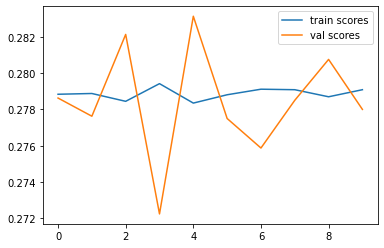

In [16]:
plt.plot(train_scores)
plt.plot(val_scores)
plt.legend(["train scores", "val scores"])

In [17]:
# Training with full train_data
model.fit(X_train, y_train)

# Internal structure
y_train_unique, y_train_counts = np.unique(y_train, return_counts=True)
y_test_unique, y_test_counts = np.unique(y_test, return_counts=True)

# Scores
train_score_ = model.score(X_train, y_train)
test_score_ = model.score(X_test, y_test)

# Prediction
prediction = model.predict(X_test)

# Confusion matrix
cm = metrics.confusion_matrix(y_test, prediction)

print("Train set model:")
print("#" * 50)
print("\nTrain structure:", dict(zip(y_train_unique, y_train_counts / len(y_train) * 100)))
print("Train score:", train_score_)
print("#" * 50)
print("\nTest set model:")
print("Validation structure:", dict(zip(y_test_unique, y_test_counts / len(y_test) * 100)))
print("Test score:", test_score_)
print("#" * 50)
print("\nConfusion matrix\n", cm)

Train set model:
##################################################

Train structure: {1: 7.445, 2: 24.39875, 3: 27.39625, 4: 17.2875, 5: 3.7225, 6: 10.99, 7: 0.8750000000000001, 8: 3.3062500000000004, 9: 1.47, 10: 0.905, 11: 2.2037500000000003}
Train score: 0.2789375
##################################################

Test set model:
Validation structure: {1: 7.355, 2: 24.785, 3: 27.675, 4: 17.405, 5: 3.45, 6: 10.96, 7: 0.7849999999999999, 8: 3.26, 9: 1.47, 10: 0.9199999999999999, 11: 1.9349999999999998}
Test score: 0.27955
##################################################

Confusion matrix
 [[   0  544  927    0    0    0    0    0    0    0    0]
 [   0 1346 3611    0    0    0    0    0    0    0    0]
 [   0 1290 4245    0    0    0    0    0    0    0    0]
 [   0  858 2623    0    0    0    0    0    0    0    0]
 [   0  187  503    0    0    0    0    0    0    0    0]
 [   0  541 1651    0    0    0    0    0    0    0    0]
 [   0   39  118    0    0    0    0    0    0    0

In [8]:
y_test_unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

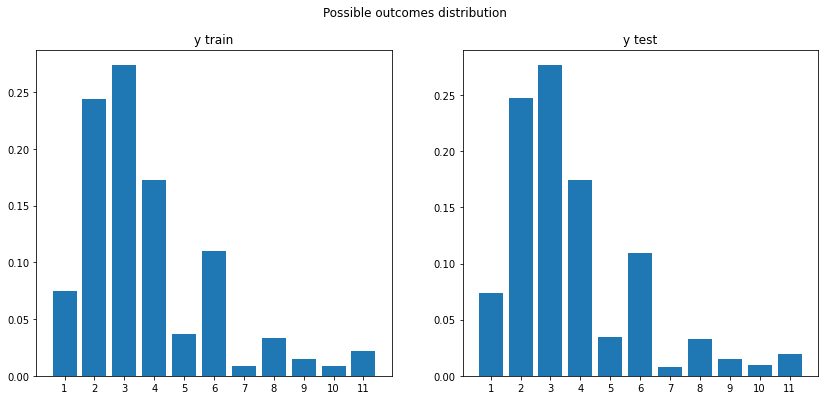

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

ax1.bar(y_train_unique, y_train_counts / len(y_train))
ax1.set_xticks(y_train_unique)
ax1.set_title("y train")

ax2.bar(y_test_unique, y_test_counts / len(y_test))
ax2.set_xticks(y_test_unique)
ax2.set_title("y test")

plt.suptitle("Possible outcomes distribution")

plt.show()

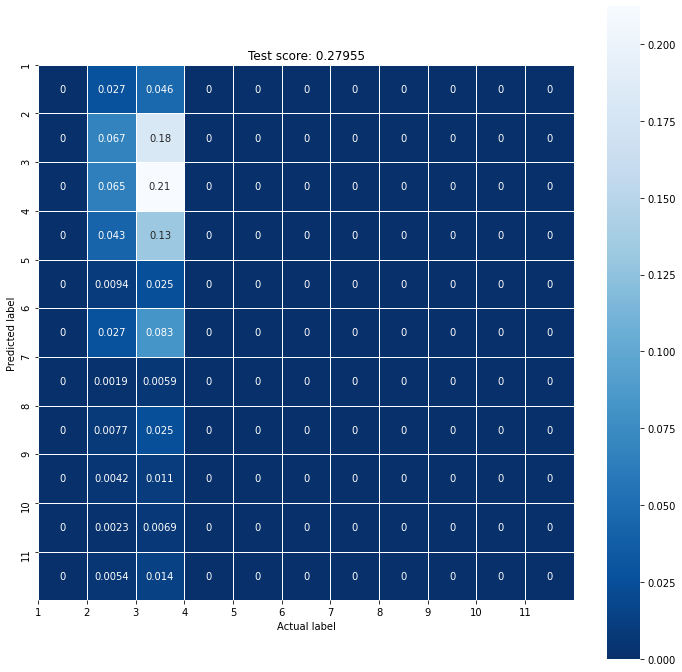

In [20]:
plt.figure(figsize = (12, 12))

sns.heatmap(cm / len(y_test), annot = True, linewidths = .5, square = True, cmap = "Blues_r")

plt.xticks(range(0, 11), range(1, 12))
plt.yticks(range(0, 11), range(1, 12))

plt.xlabel("Actual label")
plt.ylabel("Predicted label")

plt.title(f"Test score: {test_score_}")

plt.show()

# Submission

In [22]:
submission = pd.read_csv("data/sample_submission.csv")
submission.set_index("id", inplace = True)
submission.head()

,days
id,
314114,11-20
208989,31-40
305872,81-90
266099,21-30
13228,31-40


In [25]:
X_pred = pd.read_csv("data/hospital_test.csv")

column_names = pd.read_csv("data/columns_meaning.csv", index_col = 0)[:-1]
column_names_dict = column_names.to_dict()
X_pred.columns = column_names_dict["Description"].values()

##### Paso las variables nominales a dummies
X_pred = pd.get_dummies(X_pred, prefix = ["hospital_type", "hospital_city", "hospital_region", "department", "ward_type", "ward_facility"], columns = ["Unique code for the type of Hospital", "City Code of the Hospital", "Region Code of the Hospital", "Department overlooking the case", "Code for the Ward type", "Code for the Ward Facility"])

##### Mapeo las variables ordinales
# Admission Type registered by the Hospital
dict_1 = {
    "Emergency" : 1,
    "Trauma" : 2,
    "Urgent" : 3
}

# Severity of the illness recorded at the time of admission
dict_2 = {
    "Minor" : 1,
    "Moderate" : 2,
    "Extreme" : 3
}

# Age of the patient
dict_3 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
}

# Stay Days by the patient
dict_4 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
    "More than 100 Days" : 11
}

X_pred["admission_type_enc"] = X_pred["Admission Type registered by the Hospital"].map(dict_1)
X_pred["illness_severity_enc"] = X_pred["Severity of the illness recorded at the time of admission"].map(dict_2)
X_pred["admission_type_enc"] = X_pred["Age of the patient"].map(dict_3)

##### Elimino las variables que no necesito
X_pred.drop(["Admission Type registered by the Hospital", "Severity of the illness recorded at the time of admission", "Age of the patient"], axis = 1, inplace = True)

# Condition of Bed in the Ward 
X_pred.iloc[:, 3] = X_pred.iloc[:, 3].fillna(df.iloc[:, 3].mode()[0])
# City Code for the patient
X_pred.iloc[:, 5] = X_pred.iloc[:, 5].fillna(df.iloc[:, 5].mode()[0])

X_pred.head()

,Case_ID registered in Hospital,Unique code for the Hospital,Number of Extra rooms available in the Hospital,Condition of Bed in the Ward,Unique Patient Id,City Code for the patient,Number of Visitors with the patient,Deposit at the Admission Time,hospital_type_a,hospital_type_b,...,ward_type_T,ward_type_U,ward_facility_A,ward_facility_B,ward_facility_C,ward_facility_D,ward_facility_E,ward_facility_F,admission_type_enc,illness_severity_enc
0,314114,19,4,2.0,59278,8.0,2,4778.0,1,0,...,0,0,0,0,1,0,0,0,5,1
1,208989,15,3,2.0,102253,15.0,3,5734.0,0,0,...,0,0,0,0,0,0,0,1,4,2
2,305872,17,4,4.0,5828,4.0,3,5064.0,0,0,...,0,0,0,0,0,0,1,0,8,1
3,266099,3,4,2.0,56642,9.0,4,3254.0,0,0,...,0,0,1,0,0,0,0,0,4,3
4,13228,6,4,1.0,116266,8.0,3,4639.0,1,0,...,0,0,0,0,0,0,0,1,3,1


In [26]:
X_pred.isna().sum()

Case_ID registered in Hospital                     0
Unique code for the Hospital                       0
Number of Extra rooms available in the Hospital    0
Condition of Bed in the Ward                       0
Unique Patient Id                                  0
City Code for the patient                          0
Number of Visitors with the patient                0
Deposit at the Admission Time                      0
hospital_type_a                                    0
hospital_type_b                                    0
hospital_type_c                                    0
hospital_type_d                                    0
hospital_type_e                                    0
hospital_type_f                                    0
hospital_type_g                                    0
hospital_city_1                                    0
hospital_city_2                                    0
hospital_city_3                                    0
hospital_city_4                               

In [27]:
dict_5 = {
    1 : "0-10",
    2 : "11-20",
    3 : "21-30",
    4 : "31-40",
    5 : "41-50",
    6 : "51-60",
    7 : "61-70",
    8 : "71-80",
    9 : "81-90",
    10 : "91-100",
    11 : "More than 100 Days"
}

to_submit = X_pred
to_submit["prediction"] = model.predict(X_pred)

to_submit = to_submit[["Case_ID registered in Hospital", "prediction"]]
to_submit.columns = ["id", "days"]
to_submit.days = to_submit.days.map(dict_5)
to_submit.set_index("id", inplace = True)

to_submit

,days
id,
314114,11-20
208989,21-30
305872,11-20
266099,11-20
13228,21-30
...,...
318155,11-20
144850,21-30
180676,21-30


In [28]:
to_submit.to_csv("submissions/submission2.csv")